In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Preços outliers de diamante

<bound method NDFrame._add_numeric_operations.<locals>.any of 0        False
1        False
2        False
3        False
4        False
         ...  
27745    False
27746    False
27747    False
27748    False
27749    False
Name: price, Length: 53940, dtype: bool>


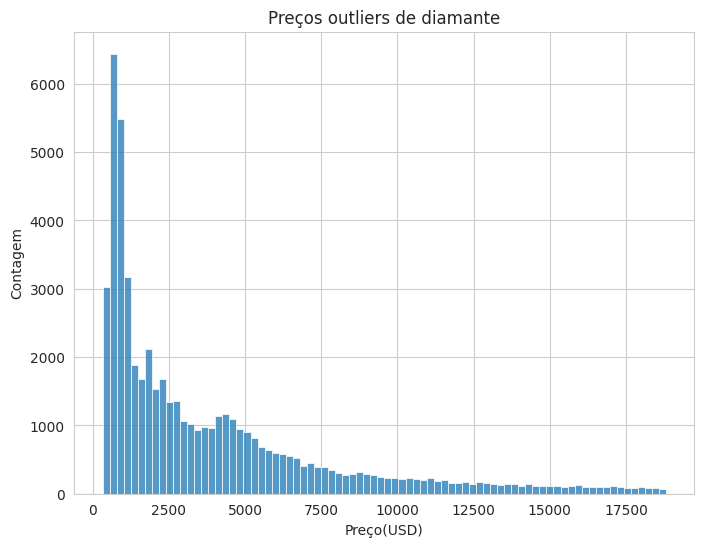

In [2]:
# Carregando o dataset e extraindo a coluna de interesse

data_diamond = sns.load_dataset('diamonds')
data_price_outlier = data_diamond['price'].sort_values()

# Conferindo se há valores nulos na série

print(data_price_outlier.isnull().any)

# Ajustando tamanho do gráfico

plt.figure(figsize=(8,6))

# Gerando o gráfico, seus títulos e o grid

with sns.axes_style('whitegrid'):
    grafico_price_outlier = sns.histplot(x=data_price_outlier)
    grafico_price_outlier.set(title='Preços outliers de diamante', xlabel='Preço(USD)', ylabel='Contagem')

# Salvando o gráfico no formato .png
    
plt.savefig('grafico_preco_outliers_diamante.png')

Insight 1: Observando a diminuição na contagem de diamantes à medida que o preço aumenta, podemos inferir que diamantes mais caros são mais raros no conjunto de dados, refletindo a valorização de diamantes de alta qualidade pelos consumidores. Essa tendência sugere uma segmentação do mercado e indica oportunidades para estratégias de marketing e precificação mais eficazes. 

Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [3]:
# Vizualizando o dataframe original
data_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Com base no gráfico de correlação vi a possibilidade da geração de métricas para um insight mais aprofundado e coeso

,média,mediana,desvio padrão
clarity,,,
IF,2864.839106,1080.0,3920.248499
VVS1,2523.114637,1093.0,3334.838888
VVS2,3283.737071,1311.0,3821.647537
VS1,3839.455391,2005.0,4011.747958
VS2,3924.989395,2054.0,4042.302816
SI1,3996.001148,2822.0,3799.483853
SI2,5063.028606,4072.0,4260.458578
I1,3924.168691,3344.0,2806.778270


,média,mediana,desvio padrão
clarity,,,
IF,0.505123,0.35,0.313433
VVS1,0.503321,0.39,0.299557
VVS2,0.596202,0.44,0.359697
VS1,0.727158,0.57,0.423529
VS2,0.763935,0.63,0.446292
SI1,0.850482,0.76,0.449652
SI2,1.077648,1.01,0.516653
I1,1.283846,1.12,0.632436


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_8452\2614854890.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_price_clarity = sns.barplot(data=metricas_price_clarity_ordenadas, x=metricas_price_clarity_ordenadas.index, y='média', errorbar=None, palette='pastel')


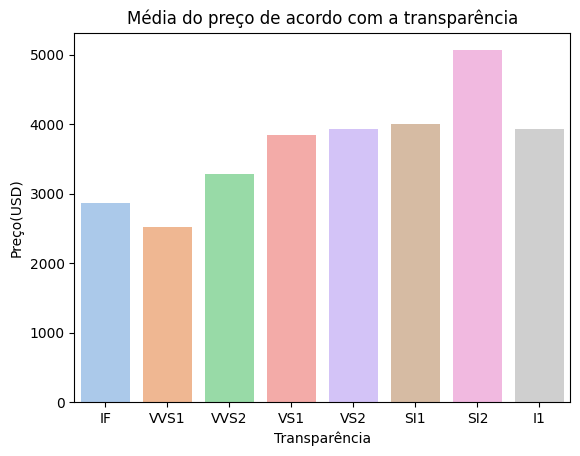

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_8452\2614854890.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_carat_clarity = sns.barplot(data=metricas_carat_clarity_ordenadas, x=metricas_carat_clarity_ordenadas.index, y='média', errorbar=None, palette='pastel')


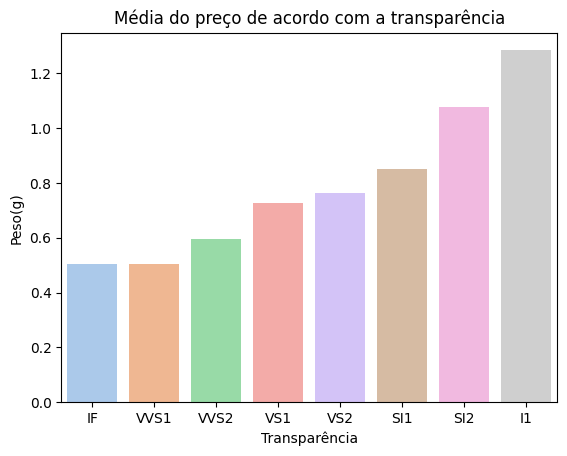

In [5]:
# Gerando métricas para auxiliar na geração de insight

# Gerando métricas PricexClarity

metricas_price_clarity = data_carat_clarity_price_df.groupby('clarity')['price'].agg(['mean', 'median', 'std'])
metricas_price_clarity.columns = ['média', 'mediana', 'desvio padrão']
metricas_price_clarity_ordenadas = metricas_price_clarity.sort_values(by='média', ascending=True)
display(metricas_price_clarity)

# Gerando métricas CaratxClarity

metricas_carat_clarity = data_carat_clarity_price_df.groupby('clarity')['carat'].agg(['mean', 'median', 'std'])
metricas_carat_clarity.columns = ['média', 'mediana', 'desvio padrão']
metricas_carat_clarity_ordenadas = metricas_carat_clarity.sort_values(by='média', ascending=True)
display(metricas_carat_clarity)

# Criando o gráfico de barras PricexClarity
grafico_price_clarity = sns.barplot(data=metricas_price_clarity_ordenadas, x=metricas_price_clarity_ordenadas.index, y='média', errorbar=None, palette='pastel')

# Definindo título, rótulos dos eixos x e y
grafico_price_clarity.set_title('Média do preço de acordo com a transparência')
grafico_price_clarity.set_xlabel(xlabel='Transparência')
grafico_price_clarity.set_ylabel(ylabel='Preço(USD)')

# Apresentando gráfico
plt.show(grafico_price_clarity)

# Criando o gráfico de barras CaratxClarity
grafico_carat_clarity = sns.barplot(data=metricas_carat_clarity_ordenadas, x=metricas_carat_clarity_ordenadas.index, y='média', errorbar=None, palette='pastel')

# Definindo título, rótulos dos eixos x e y
grafico_carat_clarity.set_title('Média do preço de acordo com a transparência')
grafico_carat_clarity.set_xlabel(xlabel='Transparência')
grafico_carat_clarity.set_ylabel(ylabel='Peso(g)')

# Apresentando gráfico
plt.show(grafico_carat_clarity)

Insight 2: Com base no gráfico de dispersão e com a comprovação por meio do uso de gráficos de barra, podemos observar que os diamantes classificados como VVS1 e IF apresentam as menores médias de preço, enquanto os classificados como SI2 e I1 têm as maiores médias de preço. Isso sugere que a transparência influencia significativamente o preço do diamante, com diamantes mais transparentes geralmente tendendo a ter preços mais altos. Da mesma forma, os diamantes classificados como VVS1 e IF têm as menores médias de peso, enquanto os classificados como I1 têm a maior média de peso. Isso sugere que diamantes mais transparentes tendem a ser mais leves, enquanto diamantes menos transparentes tendem a ser mais pesados. É importante observar uma correlação positiva forte entre preço e peso indicaria que diamantes mais pesados tendem a ter preços mais altos, enquanto uma correlação negativa forte indicaria o oposto. Isso nos ajudaria a entender melhor como o preço é influenciado pelo peso do diamante, independentemente da transparência. Em contrapartida, é importante resaltar que dispersão dos preços e pesos, indicada pelo desvio padrão, é bastante alta para todas as classificações de transparência. Isso pode indicar uma ampla variação nos preços e pesos dentro de cada categoria de transparência.

Distribuição contínua aproximada do peso (`weight`) de carros

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


,weight,name
54,1613,datsun 1200
144,1649,toyota corona
343,1755,toyota starlet
345,1760,honda civic 1300
53,1773,toyota corolla 1200
...,...,...
95,4951,buick electra 225 custom
90,4952,mercury marquis brougham
42,4955,dodge monaco (sw)
103,4997,chevrolet impala


weight    False
name      False
dtype: bool


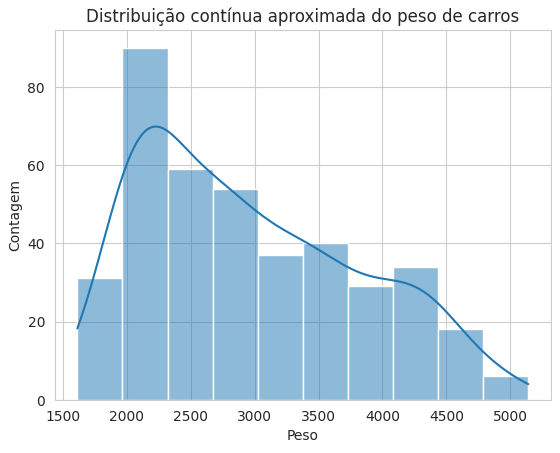

In [43]:
# # Carregando o dataset e extraindo a coluna de interesse
data_cars = sns.load_dataset('mpg')
display(data_cars)
data_weight_name_df = data_cars[['weight', 'name']]

# Ordenando os dados pelo peso
data_weight_name_ordenado_df = data_weight_name_df.sort_values(by='weight', ascending=True)
display(data_weight_name_ordenado_df)

# Verificando se há valores nulos no dataframe
print(data_weight_name_ordenado_df.isnull().any())

# Gerando o grid do gráfico 
with sns.axes_style('whitegrid'):
    # Criando o gráfico KDE
    grafico_weight_cars = sns.histplot(data=data_weight_name_ordenado_df, x='weight', kde=True)

    # Definindo título, rótulos dos eixos x e y
    grafico_weight_cars.set_title('Distribuição contínua aproximada do peso de carros')
    grafico_weight_cars.set_xlabel(xlabel='Peso')
    grafico_weight_cars.set_ylabel(ylabel='Contagem')

    # Salvando o gráfico no formato .png
    plt.savefig('grafico_weight_cars.png')

# Apresentando o gráfico
plt.show(grafico_weight_cars)

Insight 3: Com base no gráfico, podemos observar que existe uma grande concentração de carros com peso entre 2.000 e 2.500, enquanto a quantidade de carros considerados pesados é relativamente baixa. Essa observação sugere que há uma preferência geral por carros de peso médio na faixa de 2.000 a 2.500. Essa faixa de peso pode representar uma escolha comum para uma variedade de consumidores devido a uma combinação de fatores, como eficiência de combustível, manobrabilidade, espaço interno e capacidade de carga. Por outro lado, a baixa quantidade de carros pesados pode refletir uma demanda mais limitada por veículos nessa faixa de peso. Carros mais pesados podem ser menos populares devido a preocupações com eficiência de combustível, custos de manutenção mais elevados e requisitos de espaço de estacionamento.